# Equivalent Components

In [1]:
import schemdraw.elements as elm
import schemdraw
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


## Series, Parallel, Neither, Both

Elements in a circuit can be connected in four different ways:

- Series
- Parallel
- Neither
- Both

Students often assume that two elements are either in parallel or series. Beware of this false dichotomy and avoid it by studying the definitions of series and parallel connections carefully.

In series or parallel, some components can be combined. When neither, they can not.

### Series Resistors

Two elements connected in series share one node **exclusively**.

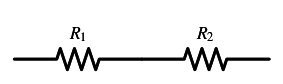

In [2]:

with schemdraw.Drawing(file='series-resistors.svg') as d:
    d += elm.Resistor().label('$R_1$')
    d += elm.Resistor().label('$R_2$')

```{figure} series-resistors.svg
---
height: 150px
name: series-resistors
---
$R_1$ and $R_2$ are in series.
```

When two elements are in series, the same current flows through each.

$$I_{R1}=I_{R2}$$

When two resistors are in series they can be redrawn as a single resistor.

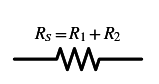

In [3]:

with schemdraw.Drawing(file='series-equivalent.svg') as d:
    d += elm.Resistor().label('$R_S = R_1 + R_2$')

```{figure} series-equivalent.svg
---
height: 150px
name: series-resistors-equivalent
---
The equivalent resistance of $R_1$ and $R_2$ in series is $R_S = R_1 + R_2$.
```

### Parallel Resistors

Two elements are in parallel when they are connected to the same two nodes.

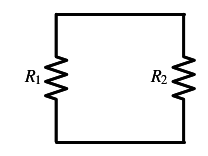

In [4]:

with schemdraw.Drawing(file='parallel-resistors.svg') as d:
    d += elm.Resistor().label('$R_1$').down()
    d += elm.Line().right()
    d += elm.Resistor().label('$R_2$').up()
    d += elm.Line().left()

```{figure} parallel-resistors.svg
---
height: 250px
name: parallel-resistors
---
$R_1$ and $R_2$ are in parallel.
```

When two resistors are in parallel they can be redrawn as a single resistor.

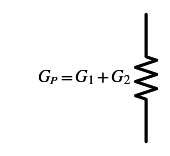

In [5]:

with schemdraw.Drawing(file='parallel-equivalent.svg') as d:
    d += elm.Resistor().label('$G_P = G_1 + G_2$').down()

```{figure} parallel-equivalent.svg
---
height: 250px
name: parallel-resistors-equivalent
---
The equivalent conductance of $G_1$ and $G_2$ in series is $G_P = G_1 + G_2$.
```

The conductances add. Recall that

$$G=\frac{1}{R}$$

so

$$\frac{1}{R_P}=\frac{1}{R_1}+\frac{1}{R_2}$$

Solving for $R_P$ and adding additional resistors

```{math}
:label: resistors-in-parallel
R_P=\frac{1}{\frac{1}{R_1}+\frac{1}{R_2}+\dots+\frac{1}{R_N}}
```

The value of two resistors in parallel is commonly expressed as

$$R_P=\frac{R_1R_2}{R_1+R_2}$$

Careful:

- They may not be drawn geometrically parallel.

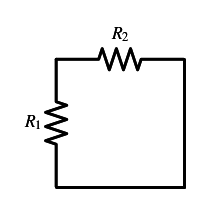

In [6]:

with schemdraw.Drawing(file='electrically-parallel-resistors.svg') as d:
    d += elm.Resistor().label('$R_1$').up()
    d += elm.Resistor().label('$R_2$').right()
    d += elm.Line().down()
    d += elm.Line().left()

```{figure} electrically-parallel-resistors.svg
---
height: 300px
name: electrically-parallel-resistors
---
$R_1$ and $R_2$ are still *electrically* in parallel.
```

- If they are drawn geometrically parallel they may not be connected in parallel.

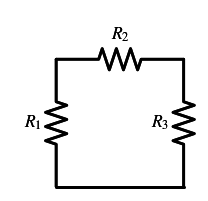

In [7]:

with schemdraw.Drawing(file='not-electrically-parallel-resistors.svg') as d:
    d += elm.Resistor().label('$R_1$').up()
    d += elm.Resistor().label('$R_2$').right()
    d += elm.Resistor().label('$R_3$').down()
    d += elm.Line().left()

```{figure} not-electrically-parallel-resistors.svg
---
height: 300px
name: not-electrically-parallel-resistors
---
$R_1$ and $R_3$ are **not** electrically in parallel.
```

```{admonition} Question
:class: tip
$R_1$ and $R_3$ are **not** in parallel.
How are they connected?
```

## More Complex Circuits

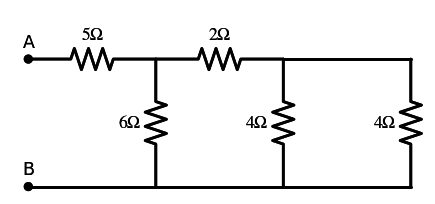

In [8]:

with schemdraw.Drawing(file='complex-example-1.svg') as d:
    d += elm.Dot().label('A')
    d += elm.Resistor().right().label('$5\Omega$')
    d.push()
    d += elm.Resistor().right().label('$2\Omega$')
    d.push()
    d += elm.Line().right()
    d += elm.Resistor().down().label('$4\Omega$')
    d += elm.Line().left()
    d += elm.Line().left()
    d += elm.Line().left()
    d += elm.Dot().label('B')
    d.pop()
    d += elm.Resistor().down().label('$4\Omega$')
    d.pop()
    d += elm.Resistor().down().label('$6\Omega$')

````{admonition} Example

Find $R_{AB}$

```{figure} complex-example-1.svg
---
height: 250px
name: complex-example-1
---
A more complex example.
```

```{admonition} Solution
:class: tip, dropdown
$R_{AB}=7.4\Omega$
```

````

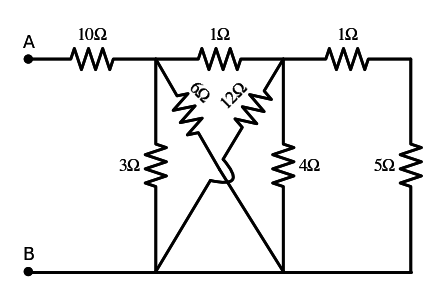

In [9]:

with schemdraw.Drawing(file='complex-example-2.svg') as d:
    d += elm.Dot().label('A')
    d += elm.Resistor().right().label('$10\Omega$')
    d.push()
    d += (R2 := elm.Resistor().right().label('$1\Omega$'))
    d.push()
    d += elm.Resistor().right().label('$1\Omega$')
    d += elm.Resistor().down().label('$5\Omega$').length(5)
    d += elm.Line().left()
    d += (L1 := elm.Line().left())
    d += elm.Line().left()
    d += elm.Dot().label('B')
    d.pop()
    d += (R5 := elm.Resistor().down().label('$4\Omega$', loc='bottom').length(5))
    d.pop()
    d.push()
    d += (R7 := elm.Resistor().down().label('$3\Omega$').length(5))
    # d += elm.Resistor().endpoints(R2.start, L1.start).label('$6\Omega$')
    # d += elm.Resistor().endpoints(R2.end, L1.end).label('$12\Omega$')
    d.pop()
    d += (R6 := elm.Resistor().theta(-60).label('$6\Omega$', halign='right', rotate=-45))
    d += elm.Line().endpoints(R6.end, R5.end)
    d.move_from(R5.start,0,0)
    d += (R8 := elm.Resistor().label('$12\Omega$', halign='center', rotate=45).theta(-121).length(2.75))
    d += (A1 := elm.Arc2(k=1.5).delta(-0.3,-0.5))
    d += elm.Line().endpoints(A1.end, R7.end)

````{admonition} Example

Find $R_{AB}$

```{figure} complex-example-2.svg
---
height: 250px
name: complex-example-2
---
Another complex example.
```

```{admonition} Solution
:class: tip, dropdown
$R_{AB}=11.2\Omega$
```

````

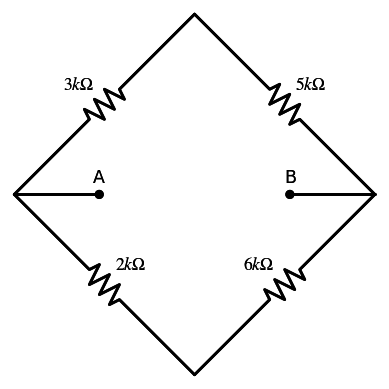

In [10]:

with schemdraw.Drawing(file='complex-example-3.svg') as d:
    d += elm.Dot().label('A')
    d += elm.Line().left().length(2)
    d += elm.Resistor().label('$3k\Omega$').theta(45).length(6)
    d += elm.Resistor().label('$5k\Omega$').length(6).theta(-45)
    d.push()
    d += elm.Line().left().length(2)
    d += elm.Dot().label('B')
    d.pop()
    d += elm.Resistor().label('$6k\Omega$').theta(-135).length(6)
    d += elm.Resistor().label('$2k\Omega$').theta(135).length(6)

````{admonition} Example

Find $R_{AB}$

```{figure} complex-example-3.svg
---
height: 250px
name: complex-example-3
---
Yet another complex example.
```

```{admonition} Solution
:class: tip, dropdown
$R_{AB}=4k\Omega$
```

````

## Series Voltage Supplies

- Polarity matters when adding voltage supplies in series.
- Circuit components can effectively be in series if they are both in series with another component.

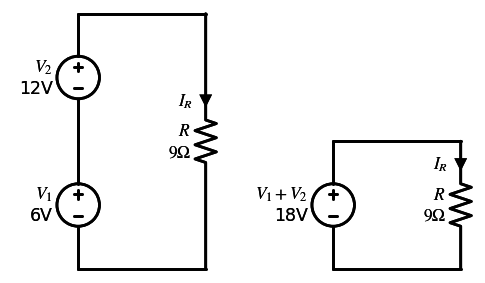

In [11]:

with schemdraw.Drawing(file='series-voltage-1.svg') as d:
   d += elm.SourceV().up().label('$V_1$\n6V')
   d += elm.SourceV().label('$V_2$\n12V')
   d += elm.Line().right()
   d += (R1 := elm.Resistor().down().label('$R$\n$9\Omega$').length(6))
   d += elm.CurrentLabelInline(direction='in').at(R1).label('$I_R$')
   d += elm.Line().left()
   d.move(6,0)
   d += elm.SourceV().up().label('$V_1 + V_2$\n18V')
   d += elm.Line().right()
   d += (R2 := elm.Resistor().down().label('$R$\n$9\Omega$'))
   d += elm.CurrentLabelInline(direction='in').at(R2).label('$I_R$')
   d += elm.Line().left()

```{figure} series-voltage-1.svg
---
height: 350px
name: series-voltage-1
---
Series voltage supplies, take one.
```

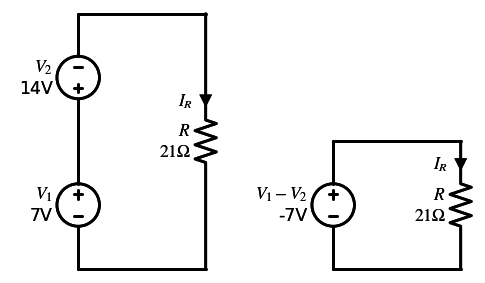

In [12]:

with schemdraw.Drawing(file='series-voltage-2.svg') as d:
   d += elm.SourceV().up().label('$V_1$\n7V')
   d += elm.SourceV().label('$V_2$\n14V').reverse()
   d += elm.Line().right()
   d += (R1 := elm.Resistor().down().label('$R$\n$21\Omega$').length(6))
   d += elm.CurrentLabelInline(direction='in').at(R1).label('$I_R$')
   d += elm.Line().left()
   d.move(6,0)
   d += elm.SourceV().up().label('$V_1 - V_2$\n-7V')
   d += elm.Line().right()
   d += (R2 := elm.Resistor().down().label('$R$\n$21\Omega$'))
   d += elm.CurrentLabelInline(direction='in').at(R2).label('$I_R$')
   d += elm.Line().left()

```{figure} series-voltage-2.svg
---
height: 350px
name: series-voltage-2
---
Series voltage supplies, take two.
```

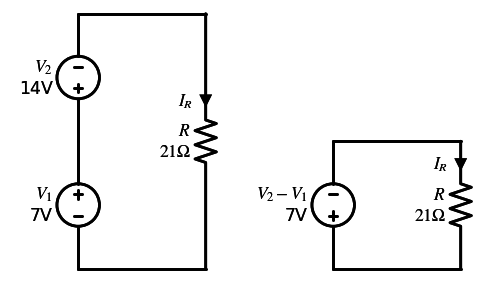

In [13]:

with schemdraw.Drawing(file='series-voltage-3.svg') as d:
   d += elm.SourceV().up().label('$V_1$\n7V')
   d += elm.SourceV().label('$V_2$\n14V').reverse()
   d += elm.Line().right()
   d += (R1 := elm.Resistor().down().label('$R$\n$21\Omega$').length(6))
   d += elm.CurrentLabelInline(direction='in').at(R1).label('$I_R$')
   d += elm.Line().left()
   d.move(6,0)
   d += elm.SourceV().up().label('$V_2 - V_1$\n7V').reverse()
   d += elm.Line().right()
   d += (R2 := elm.Resistor().down().label('$R$\n$21\Omega$'))
   d += elm.CurrentLabelInline(direction='in').at(R2).label('$I_R$')
   d += elm.Line().left()

```{figure} series-voltage-3.svg
---
height: 350px
name: series-voltage-3
---
Series voltage supplies, take three.
```

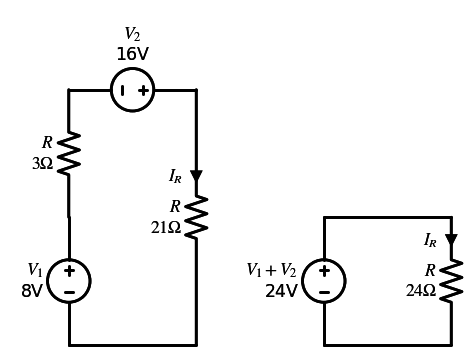

In [14]:

with schemdraw.Drawing(file='series-voltage-4.svg') as d:
   d += elm.SourceV().up().label('$V_1$\n8V')
   d += elm.Resistor().label('$R$\n$3\Omega$')
   d += elm.SourceV().label('$V_2$\n16V').right()
   d += (R1 := elm.Resistor().down().label('$R$\n$21\Omega$').length(6))
   d += elm.CurrentLabelInline(direction='in').at(R1).label('$I_R$')
   d += elm.Line().left()
   d.move(6,0)
   d += elm.SourceV().up().label('$V_1 +  V_2$\n24V')
   d += elm.Line().right()
   d += (R2 := elm.Resistor().down().label('$R$\n$24\Omega$'))
   d += elm.CurrentLabelInline(direction='in').at(R2).label('$I_R$')
   d += elm.Line().left()

```{figure} series-voltage-4.svg
---
height: 350px
name: series-voltage-4
---
Series voltage supplies, take four.
```

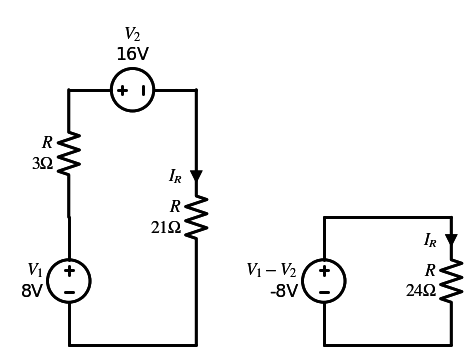

In [15]:

with schemdraw.Drawing(file='series-voltage-5.svg') as d:
   d += elm.SourceV().up().label('$V_1$\n8V')
   d += elm.Resistor().label('$R$\n$3\Omega$')
   d += elm.SourceV().label('$V_2$\n16V').right().reverse()
   d += (R1 := elm.Resistor().down().label('$R$\n$21\Omega$').length(6))
   d += elm.CurrentLabelInline(direction='in').at(R1).label('$I_R$')
   d += elm.Line().left()
   d.move(6,0)
   d += elm.SourceV().up().label('$V_1 -  V_2$\n-8V')
   d += elm.Line().right()
   d += (R2 := elm.Resistor().down().label('$R$\n$24\Omega$'))
   d += elm.CurrentLabelInline(direction='in').at(R2).label('$I_R$')
   d += elm.Line().left()

```{figure} series-voltage-5.svg
---
height: 350px
name: series-voltage-5
---
Series voltage supplies, take five.
```

## Parallel Current Supplies

- Polarity matters when adding current supplies in parallel.
- Circuit components can effectively be in parallel if they are both in parallel with another component.

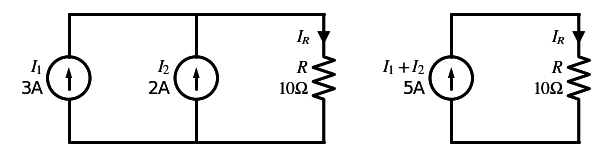

In [16]:

with schemdraw.Drawing(file='parallel-current-1.svg') as d:
   d += elm.SourceI().up().label('$I_1$\n3A')
   d += elm.Line().right().length(6)
   d += (R1 := elm.Resistor().label('$R$\n$10\Omega$').down())
   d += elm.CurrentLabelInline(direction='in').at(R1).label('$I_R$')
   d += elm.Line().left()
   d.push()
   d += elm.SourceI().up().label('$I_2$\n2A')
   d.pop()
   d += elm.Line().left()
   d.move(9,0)
   d += elm.SourceI().up().label('$I_1 + I_2$\n5A')
   d += elm.Line().right()
   d += (R2 := elm.Resistor().label('$R$\n$10\Omega$').down())
   d += elm.CurrentLabelInline(direction='in').at(R2).label('$I_R$')
   d += elm.Line().left()

```{figure} parallel-current-1.svg
---
height: 150px
name: parallel-current-1
---
Parallel current supplies, take one.
```

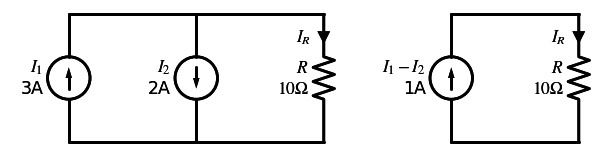

In [17]:

with schemdraw.Drawing(file='parallel-current-2.svg') as d:
   d += elm.SourceI().up().label('$I_1$\n3A')
   d += elm.Line().right().length(6)
   d += (R1 := elm.Resistor().label('$R$\n$10\Omega$').down())
   d += elm.CurrentLabelInline(direction='in').at(R1).label('$I_R$')
   d += elm.Line().left()
   d.push()
   d += elm.SourceI().up().label('$I_2$\n2A').reverse()
   d.pop()
   d += elm.Line().left()
   d.move(9,0)
   d += elm.SourceI().up().label('$I_1 - I_2$\n1A')
   d += elm.Line().right()
   d += (R2 := elm.Resistor().label('$R$\n$10\Omega$').down())
   d += elm.CurrentLabelInline(direction='in').at(R2).label('$I_R$')
   d += elm.Line().left()

```{figure} parallel-current-2.svg
---
height: 150px
name: parallel-current-2
---
Parallel current supplies, take two.
```

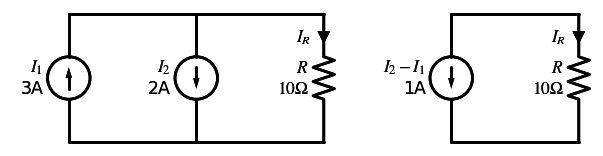

In [18]:

with schemdraw.Drawing(file='parallel-current-3.svg') as d:
   d += elm.SourceI().up().label('$I_1$\n3A')
   d += elm.Line().right().length(6)
   d += (R1 := elm.Resistor().label('$R$\n$10\Omega$').down())
   d += elm.CurrentLabelInline(direction='in').at(R1).label('$I_R$')
   d += elm.Line().left()
   d.push()
   d += elm.SourceI().up().label('$I_2$\n2A').reverse()
   d.pop()
   d += elm.Line().left()
   d.move(9,0)
   d += elm.SourceI().up().label('$I_2 - I_1$\n1A').reverse()
   d += elm.Line().right()
   d += (R2 := elm.Resistor().label('$R$\n$10\Omega$').down())
   d += elm.CurrentLabelInline(direction='in').at(R2).label('$I_R$')
   d += elm.Line().left()

```{figure} parallel-current-3.svg
---
height: 150px
name: parallel-current-3
---
Parallel current supplies, take three.
```

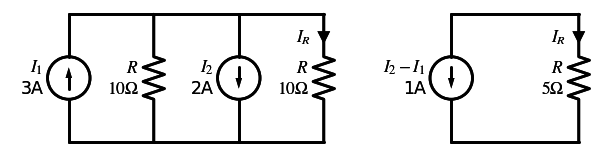

In [19]:

with schemdraw.Drawing(file='parallel-current-4.svg') as d:
   d += elm.SourceI().up().label('$I_1$\n3A')
   d += elm.Line().right().length(6)
   d += (R1 := elm.Resistor().label('$R$\n$10\Omega$').down())
   d += elm.CurrentLabelInline(direction='in').at(R1).label('$I_R$')
   d += elm.Line().left().length(2)
   d.push()
   d += elm.SourceI().up().label('$I_2$\n2A').reverse()
   d.pop()
   d += elm.Line().left().length(2)
   d.push()
   d += elm.Resistor().label('$R$\n$10\Omega$').up()
   d.pop()
   d += elm.Line().left().length(2)
   d.move(9,0)
   d += elm.SourceI().up().label('$I_2 - I_1$\n1A').reverse()
   d += elm.Line().right()
   d += (R2 := elm.Resistor().label('$R$\n$5\Omega$').down())
   d += elm.CurrentLabelInline(direction='in').at(R2).label('$I_R$')
   d += elm.Line().left()

```{figure} parallel-current-4.svg
---
height: 150px
name: parallel-current-4
---
Parallel current supplies, take four.
```

## Delta-Wye Conversions

\begin{align}
R_a &= \frac{R_1 R_2}{R_1 + R_2 + R_3} \\
R_b &= \frac{R_1 R_3}{R_1 + R_2 + R_3} \\
R_c &= \frac{R_2 R_3}{R_1 + R_2 + R_3}
\end{align}

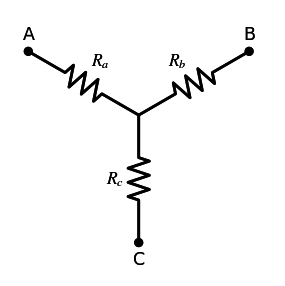

In [20]:

with schemdraw.Drawing(file='wye.svg') as d:
    d += elm.Dot().label('A')
    d += elm.Resistor().theta(-30).label('$R_a$')
    d.push()
    d += elm.Resistor().theta(30).label('$R_b$')
    d += elm.Dot().label('B')
    d.pop()
    d += elm.Resistor().down().label('$R_c$')
    d += elm.Dot().label('C', loc='bot')

```{figure} wye.svg
---
height: 350px
name: wye
---
The wye configuration.
```

\begin{align}
R_1 &= \frac{R_a R_b + R_b R_c + R_a R_c}{R_c} \\
R_2 &= \frac{R_a R_b + R_b R_c + R_a R_c}{R_b} \\
R_3 &= \frac{R_a R_b + R_b R_c + R_a R_c}{R_a}
\end{align}

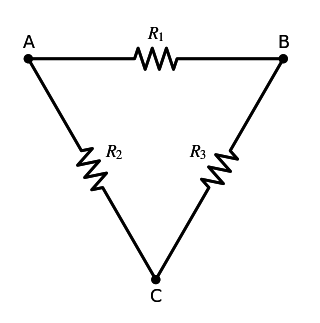

In [21]:

with schemdraw.Drawing(file='delta.svg') as d:
   d += elm.Dot().label('A')
   d += elm.Resistor().right().label('$R_1$').length(6)
   d += elm.Dot().label('B')
   d += elm.Resistor().theta(-120).label('$R_3$').length(6)
   d += elm.Dot().label('C', loc='bot')
   d += elm.Resistor().theta(120).label('$R_2$').length(6)

```{figure} delta.svg
---
height: 350px
name: delta
---
The delta configuration.
```